In [1]:
!git clone https://github.com/atharva-diwan/ME781_course_project_grp31.git

Cloning into 'ME781_course_project_grp31'...
remote: Enumerating objects: 29, done.
remote: Counting objects: 100% (29/29), done.
remote: Compressing objects: 100% (17/17), done.
remote: Total 29 (delta 12), reused 23 (delta 6), pack-reused 0
Unpacking objects: 100% (29/29), done.


In [2]:
cd ME781_course_project_grp31/

/content/ME781_course_project_grp31


In [3]:
!pip install -r requirements.txt

In [4]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

#Downloading big5 personality dataset

In [5]:
!gdown 'https://drive.google.com/uc?export=download&id=1EyZ8IBXhPrIkvLnjKaFVIAsAejbgTQHZ'

Downloading...
From: https://drive.google.com/uc?export=download&id=1EyZ8IBXhPrIkvLnjKaFVIAsAejbgTQHZ
To: /content/ME781_course_project_grp31/big_5_dataset.zip
100% 167M/167M [00:02<00:00, 73.6MB/s]


In [6]:
!unzip 'big_5_dataset.zip' -d big5_personality_dataset/

Archive:  big_5_dataset.zip
 extracting: big5_personality_dataset/IPIP-FFM-data-8Nov2018/.directory  
  inflating: big5_personality_dataset/IPIP-FFM-data-8Nov2018/codebook.txt  
  inflating: big5_personality_dataset/IPIP-FFM-data-8Nov2018/data-final.csv  
  inflating: big5_personality_dataset/IPIP-FFM-data-8Nov2018/sample_excel_file.xlsx  


## Loading the Data Set

In [7]:
data_raw = pd.read_csv('big5_personality_dataset/IPIP-FFM-data-8Nov2018/data-final.csv', sep='\t')
data = data_raw.copy()
pd.options.display.max_columns = 150

data.drop(data.columns[50:107], axis=1, inplace=True)
data.drop(data.columns[51:], axis=1, inplace=True)

print('Number of participants: ', len(data))
data.head()

Number of participants:  1015341


,EXT1,EXT2,EXT3,EXT4,EXT5,EXT6,EXT7,EXT8,EXT9,EXT10,EST1,EST2,EST3,EST4,EST5,EST6,EST7,EST8,EST9,EST10,AGR1,AGR2,AGR3,AGR4,AGR5,AGR6,AGR7,AGR8,AGR9,AGR10,CSN1,CSN2,CSN3,CSN4,CSN5,CSN6,CSN7,CSN8,CSN9,CSN10,OPN1,OPN2,OPN3,OPN4,OPN5,OPN6,OPN7,OPN8,OPN9,OPN10,country
0,4.0,1.0,5.0,2.0,5.0,1.0,5.0,2.0,4.0,1.0,1.0,4.0,4.0,2.0,2.0,2.0,2.0,2.0,3.0,2.0,2.0,5.0,2.0,4.0,2.0,3.0,2.0,4.0,3.0,4.0,3.0,4.0,3.0,2.0,2.0,4.0,4.0,2.0,4.0,4.0,5.0,1.0,4.0,1.0,4.0,1.0,5.0,3.0,4.0,5.0,GB
1,3.0,5.0,3.0,4.0,3.0,3.0,2.0,5.0,1.0,5.0,2.0,3.0,4.0,1.0,3.0,1.0,2.0,1.0,3.0,1.0,1.0,4.0,1.0,5.0,1.0,5.0,3.0,4.0,5.0,3.0,3.0,2.0,5.0,3.0,3.0,1.0,3.0,3.0,5.0,3.0,1.0,2.0,4.0,2.0,3.0,1.0,4.0,2.0,5.0,3.0,MY
2,2.0,3.0,4.0,4.0,3.0,2.0,1.0,3.0,2.0,5.0,4.0,4.0,4.0,2.0,2.0,2.0,2.0,2.0,1.0,3.0,1.0,4.0,1.0,4.0,2.0,4.0,1.0,4.0,4.0,3.0,4.0,2.0,2.0,2.0,3.0,3.0,4.0,2.0,4.0,2.0,5.0,1.0,2.0,1.0,4.0,2.0,5.0,3.0,4.0,4.0,GB
3,2.0,2.0,2.0,3.0,4.0,2.0,2.0,4.0,1.0,4.0,3.0,3.0,3.0,2.0,3.0,2.0,2.0,2.0,4.0,3.0,2.0,4.0,3.0,4.0,2.0,4.0,2.0,4.0,3.0,4.0,2.0,4.0,4.0,4.0,1.0,2.0,2.0,3.0,1.0,4.0,4.0,2.0,5.0,2.0,3.0,1.0,4.0,4.0,3.0,3.0,GB
4,3.0,3.0,3.0,3.0,5.0,3.0,3.0,5.0,3.0,4.0,1.0,5.0,5.0,3.0,1.0,1.0,1.0,1.0,3.0,2.0,1.0,5.0,1.0,5.0,1.0,3.0,1.0,5.0,5.0,3.0,5.0,1.0,5.0,1.0,3.0,1.0,5.0,1.0,5.0,5.0,5.0,1.0,5.0,1.0,5.0,1.0,5.0,3.0,5.0,5.0,KE


In [8]:
print('Is there any missing value? ', data.isnull().values.any())
print('How many missing values? ', data.isnull().values.sum())
data.dropna(inplace=True)
print('Number of participants after eliminating missing values: ', len(data))

Is there any missing value?  True
How many missing values?  89227
Number of participants after eliminating missing values:  1013481


#PCA for dimensionality reduction

#cumulative variance plot for identifying no. of components

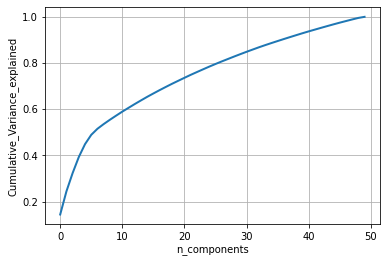

In [9]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

pca=PCA()  
pca.n_components=50

df_model = data.drop('country', axis=1)
scaler = StandardScaler()                      #for scaling the data
df_model = scaler.fit_transform(df_model)

pca_data=pca.fit_transform(df_model)
percentage_var_explained = pca.explained_variance_ratio_;  
cum_var_explained=np.cumsum(percentage_var_explained)
#plot PCA spectrum   
plt.figure(1,figsize=(6,4))
plt.clf()  
plt.plot(cum_var_explained,linewidth=2)  
plt.axis('tight')  
plt.grid()
plt.xlabel('n_components') 
plt.ylabel('Cumulative_Variance_explained') 
plt.show()

From the graph we can see that around 90% of variance is covered by 35 components

In [10]:
"""pca=PCA()  
pca.n_components=50
pca_data=pca.fit_transform(df_model) """ 
# look at explained variance of PCA components 
exp_var_cumsum=pd.Series(np.round(pca.explained_variance_ratio_.cumsum(),4)*100)  
for index,var in enumerate(exp_var_cumsum):  
    print('if n_components= %d,   variance=%f' %(index+1,np.round(var,3)))
   

if n_components= 1,   variance=14.390000
if n_components= 2,   variance=24.390000
if n_components= 3,   variance=32.330000
if n_components= 4,   variance=39.320000
if n_components= 5,   variance=44.880000
if n_components= 6,   variance=48.910000
if n_components= 7,   variance=51.530000
if n_components= 8,   variance=53.550000
if n_components= 9,   variance=55.420000
if n_components= 10,   variance=57.200000
if n_components= 11,   variance=58.950000
if n_components= 12,   variance=60.590000
if n_components= 13,   variance=62.230000
if n_components= 14,   variance=63.800000
if n_components= 15,   variance=65.350000
if n_components= 16,   variance=66.810000
if n_components= 17,   variance=68.250000
if n_components= 18,   variance=69.640000
if n_components= 19,   variance=71.000000
if n_components= 20,   variance=72.300000
if n_components= 21,   variance=73.600000
if n_components= 22,   variance=74.870000
if n_components= 23,   variance=76.070000
if n_components= 24,   variance=77.270000
i

From the table we can see that around 90% variance is covered by 36 components

# Applying PCA with no. of components as 36

In [11]:
no_of_components = 36
pca = PCA(n_components=no_of_components)
pca_fit = pca.fit_transform(df_model)
df_pca_fit = pd.DataFrame(pca_fit) #converting array to dataframe
df_pca_fit.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35
0,-4.285799,-0.119120,1.935789,-1.500694,0.124315,0.494173,0.593694,-0.120305,-0.410805,0.658206,0.428233,-0.144432,-0.076659,1.087922,-0.550454,-0.255232,0.562037,-0.817961,-0.260650,0.101493,-0.366992,-0.489248,-0.526372,-0.041159,0.147526,0.377170,0.162893,0.324842,-0.299804,0.403633,-0.071212,0.348908,-0.164667,0.241664,-0.203880,0.094656
1,0.436307,1.336241,-2.355993,2.113397,-2.369318,-0.226692,-1.521141,0.338892,-1.215291,0.166980,0.107080,-0.471562,-0.819768,-0.321132,-0.164547,0.291497,1.157747,-0.093203,0.720322,0.603193,-0.307301,1.010457,0.252586,0.066364,1.151386,0.033977,1.062697,0.391756,1.008110,0.210284,0.630621,0.525345,-0.511148,0.230498,-0.162945,-0.063152
2,-0.550435,1.329265,-1.163789,0.304444,-2.137472,1.151904,1.418618,0.484013,0.787303,-0.028021,-0.129902,-0.389344,0.495585,0.789136,-0.625927,-1.345010,1.695013,0.870668,-0.816554,0.840184,-0.466212,-0.852251,0.278661,0.175744,-0.233464,-0.025699,-1.009473,-0.380822,0.566875,0.251265,-0.278984,0.806935,-0.195187,-0.102231,0.200794,0.538950
3,0.953150,0.196135,1.427488,-0.729410,-2.097341,0.414371,0.297233,-0.627160,-0.348546,-0.527630,0.364909,1.610848,-0.974528,-0.311910,0.995804,0.663988,-0.399994,-0.646201,0.904687,-1.345373,-0.565151,-0.293398,-0.063178,-0.079885,0.770366,0.275318,-0.525045,0.249178,-0.021492,-0.585727,0.492741,0.035100,0.279582,0.813345,-0.271430,-0.327260
4,-4.061473,0.934151,-4.297848,-0.945731,-0.943385,0.218203,-0.080849,-0.237824,-1.408422,-0.493906,-0.270580,0.178566,0.066595,0.066944,-0.357291,-0.220115,0.532692,0.032582,0.238209,0.363785,0.345659,0.097185,0.011263,-0.015959,0.051922,0.994807,0.694360,-0.486424,-0.179053,1.104352,-0.496129,0.489821,0.871090,0.092810,0.232433,-0.201911


# K-Means Clustering

## How many clusters should we define?

In [12]:
# For ease of calculation lets scale all the values between 0-1 and take a sample of 5000 
from sklearn.preprocessing import MinMaxScaler

df = data.drop('country', axis=1)
columns = list(df.columns)

scaler = MinMaxScaler(feature_range=(0,1))
df = scaler.fit_transform(df)
df = pd.DataFrame(df, columns=columns)
df_sample = df[:5000]

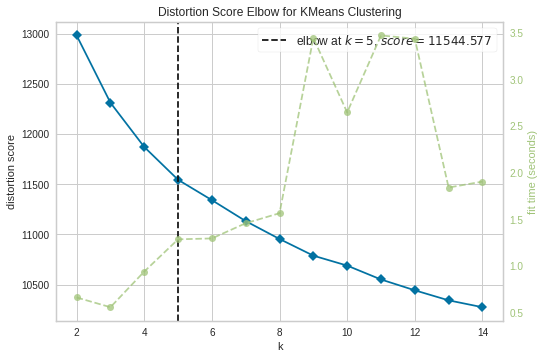

In [13]:
# Visualize the elbow
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer

kmeans = KMeans()
visualizer = KElbowVisualizer(kmeans, k=(2,15))
visualizer.fit(df_sample)
visualizer.poof()

The marginal sum of within-cluster distances between individuals & the marginal distance between the cluster centers is best at 5 clusters

## Clustering Participants into 5 Personality Groups

In [14]:
# Creating K-means Cluster Model
from sklearn.cluster import KMeans

# defining 5 clusters and fitting the model

kmeans = KMeans(n_clusters=5)
k_fit = kmeans.fit(df_pca_fit)                 # kmeans model fit on data with reduced dimensions

In [15]:
# Predicting the Clusters

pd.options.display.max_columns = 10
predictions = k_fit.labels_
df_pca_fit['Clusters'] = predictions
df_pca_fit.head()

,0,1,2,3,4,...,32,33,34,35,Clusters
0,-4.285799,-0.119120,1.935789,-1.500694,0.124315,...,-0.164667,0.241664,-0.203880,0.094656,0
1,0.436307,1.336241,-2.355993,2.113397,-2.369318,...,-0.511148,0.230498,-0.162945,-0.063152,2
2,-0.550435,1.329265,-1.163789,0.304444,-2.137472,...,-0.195187,-0.102231,0.200794,0.538950,0
3,0.953150,0.196135,1.427488,-0.729410,-2.097341,...,0.279582,0.813345,-0.271430,-0.327260,3
4,-4.061473,0.934151,-4.297848,-0.945731,-0.943385,...,0.871090,0.092810,0.232433,-0.201911,0


## Analysing the Model and Predictions

How many individual do we have for each cluster?

In [16]:
df_pca_fit.Clusters.value_counts()

0    259426
3    227222
1    212105
2    172080
4    142648
Name: Clusters, dtype: int64

Let's group the results acording to clusters. That way we can investigate the average answer to the each question for each cluster.

That way we can have an intuition about how our model classifies people.

In [17]:
pd.options.display.max_columns = 150
df_pca_fit.groupby('Clusters').mean()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35
Clusters,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,-2.941496,0.739132,-0.743584,0.222592,-0.130578,-0.062909,-0.016361,-0.001709,-0.005725,-0.037506,-0.007814,-0.014167,-0.030248,0.009442,0.011450,0.011586,-0.003565,0.018573,-0.008709,0.006246,0.009604,0.037546,-0.020423,-0.012773,0.006344,-0.003856,-0.008171,0.016720,0.000837,-0.004456,0.013758,-0.013710,0.011241,-0.010621,-0.007607,-0.002756
1,-1.124926,-1.995892,1.496283,-0.255757,0.225667,0.082041,0.015367,0.000043,-0.020887,0.032840,0.008718,-0.011868,-0.004851,-0.003544,-0.005081,0.006671,0.025504,-0.023402,0.011638,0.026457,0.009143,-0.026680,0.001400,-0.014291,-0.003136,0.017099,0.020860,-0.017555,0.004678,-0.000565,-0.030430,0.024390,-0.024540,0.007657,0.023002,0.012339
2,1.756850,1.463610,0.970009,1.874279,0.171233,-0.183506,0.079779,0.062609,0.042486,0.009576,0.032870,-0.019655,0.046370,-0.021482,0.035299,-0.012608,-0.000194,0.003388,0.027129,-0.035423,-0.022399,-0.008069,0.032420,-0.010783,-0.021551,0.014077,-0.023847,-0.021519,-0.001745,0.028622,-0.020953,0.002632,-0.023589,-0.022778,-0.004202,0.002062
3,2.148979,-1.444620,-1.131833,-0.057623,-0.560530,0.232822,-0.047809,-0.006134,0.033228,-0.034898,-0.028335,0.068609,0.063432,-0.017932,-0.011348,-0.010688,-0.008067,-0.008740,-0.015514,-0.030074,0.010774,0.016084,-0.009363,0.010347,0.026130,-0.030406,0.018547,0.012467,-0.008497,-0.016413,0.048783,-0.014795,0.024572,0.023422,0.001491,-0.006463
4,1.479788,2.159021,-0.239792,-2.193733,0.588226,-0.157070,-0.013179,-0.062712,-0.062711,0.063417,0.006730,-0.042164,-0.094755,0.042575,-0.037774,0.001244,-0.018353,0.010855,-0.009480,0.039937,-0.021203,-0.044499,0.010864,0.041005,-0.022499,0.013040,-0.016934,0.001795,0.007163,0.000562,-0.032203,0.009059,0.005361,-0.001900,-0.017673,-0.005527


## Visualizing the Cluster Predictions

In [18]:
# In order to visualize in 2D graph we will use PCA


pca = PCA(n_components=2)
pca_fit = pca.fit_transform(df_pca_fit)

df_pca = pd.DataFrame(data=pca_fit, columns=['PCA1', 'PCA2'])
df_pca['Clusters'] = predictions
df_pca.head()

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,


,PCA1,PCA2,Clusters
0,-4.592322,0.080821,0
1,0.459019,1.288359,2
2,-1.149476,1.267775,0
3,1.358022,0.195113,3
4,-4.241987,1.181737,0


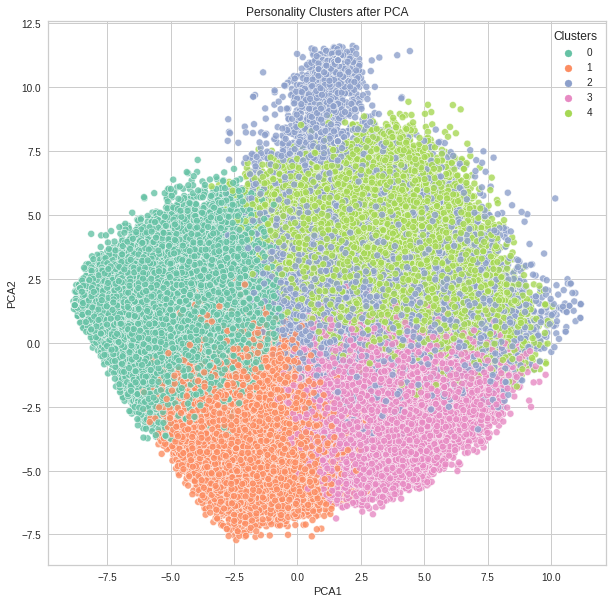

In [19]:
plt.figure(figsize=(10,10))
sns.scatterplot(data=df_pca, x='PCA1', y='PCA2', hue='Clusters', palette='Set2', alpha=0.8)
plt.title('Personality Clusters after PCA');